# knn_model Exercise

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report

import prepare
import util

In [3]:
# use the titanic data feom prepare file
titanic = prepare.prep_titanic()

titanic= titanic.drop(columns=["age"])
titanic.head()

,passenger_id,survived,pclass,sex,sibsp,parch,fare,embarked,alone,sex_male,embarked_Q,embarked_S
0,0,0,3,male,1,0,7.2500,S,0,1,0,1
1,1,1,1,female,1,0,71.2833,C,0,0,0,0
2,2,1,3,female,0,0,7.9250,S,1,0,0,1
3,3,1,1,female,1,0,53.1000,S,0,0,0,1
4,4,0,3,male,0,0,8.0500,S,1,1,0,1


**Get dataset**

**Split the data**

In [4]:
train, validate, test = prepare.split_data_(df=titanic, validate_size=.25, random_state=95, stratify_col="survived")

In [5]:
train.shape, validate.shape, test.shape

((489, 12), (223, 12), (179, 12))

**Create X & y version of train, where y is a series with just the target variable and X are all the features.**

In [6]:
# get only the valid feature columns to the model
columns = []
for i in train.columns:
    if i in ["embarked", "sex", "passenger_id", "survived"]:
        pass
    else:
        columns.append(i)

In [7]:
# features from p calss to alone
xtrain = train[columns]

# y variable to be predicted
ytrain = train.survived

# -------------------------------------
# features from p calss to alone
xvalidate = validate[columns]

# y variable to be predicted
yvalidate = validate.survived

# -------------------------------------
# features from p calss to alone
xtest = test[columns]

# y variable to be predicted
ytest= test.survived

1. **Fit a K-Nearest Neighbors classifier to your training sample and transform (i.e. make predictions on the training sample)**

### Train Model

In [31]:
# get a knn object
knn = KNeighborsClassifier(n_neighbors=3, weights='distance', p=1)
knn

KNeighborsClassifier(n_neighbors=3, p=1, weights='distance')

**Fit training data**

In [32]:
knn.fit(xtrain, ytrain) 

KNeighborsClassifier(n_neighbors=3, p=1, weights='distance')

**Make prediction**

In [33]:
ypred = knn.predict(xtrain)
ypred

array([0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,

**Estimate probability**

In [34]:
ypred_proba = knn.predict_proba(xtrain)
ypred_proba[:5]

array([[0.66666667, 0.33333333],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.66666667, 0.33333333]])

In [35]:
# survised = 1 
# didn't make it = 0
knn.classes_

array([0, 1])

**2. Evaluate your results using the model score, confusion matrix, and classification report.**

**Compute the Accuracy**

In [36]:
print(f"accuracy of KNN classifier on training is {knn.score(xtrain, ytrain)}")

accuracy of KNN classifier on training is 0.9386503067484663


**createa comfusion matris**

In [37]:
# confution matrix agaist the prediction
survived_cm = confusion_matrix(ytrain, ypred)
survived_cm

array([[292,  10],
       [ 20, 167]])

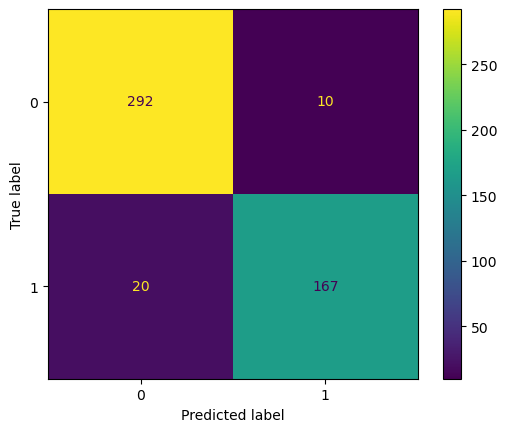

In [38]:
ConfusionMatrixDisplay.from_estimator(knn, xtrain, ytrain)


3. Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

In [39]:
# clssifiaction report for all matrics
class_report = classification_report(ytrain, ypred)

print(class_report)

              precision    recall  f1-score   support

           0       0.94      0.97      0.95       302
           1       0.94      0.89      0.92       187

    accuracy                           0.94       489
   macro avg       0.94      0.93      0.93       489
weighted avg       0.94      0.94      0.94       489



**4. Run through steps 1-3 setting k to 10**

In [41]:
def compute_knn(xtrain, ytrain, k):
    # get a knn object
    knn = KNeighborsClassifier(n_neighbors=k, weights='distance', p=1)

    # fit the model
    knn.fit(xtrain, ytrain) 
    
    # predict the target
    ypred = knn.predict(xtrain)

    # estimate probability
    ypred_proba = knn.predict_proba(xtrain)
    
    # accuracy score for knn
    knn_acc = knn.score(xtrain, ytrain)

    # confution matrix agaist the prediction
    comfusion_mtx = confusion_matrix(ytrain, ypred)

    class_report = classification_report(ytrain, ypred)

    return knn, xtrain, ytrain, ypred, ypred_proba, knn_acc, comfusion_mtx, class_report 

In [42]:
# umpack the knn computation function
knn, xtrain, ytrain, ypred, ypred_proba, knn_acc, comfusion_mtx, class_report  = compute_knn(xtrain, ytrain, 10)


              precision    recall  f1-score   support

           0       0.92      0.98      0.95       302
           1       0.97      0.87      0.92       187

    accuracy                           0.94       489
   macro avg       0.95      0.92      0.93       489
weighted avg       0.94      0.94      0.94       489



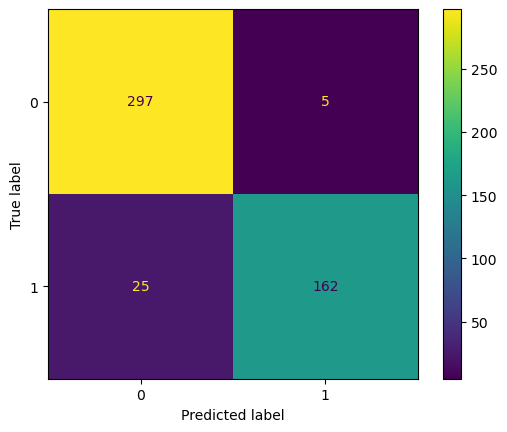

In [43]:
print(class_report)

ConfusionMatrixDisplay.from_estimator(knn, xtrain, ytrain)

**5. Run through steps 1-3 setting k to 20**

In [44]:
# umpack the knn computation function
knn, xtrain, ytrain, ypred, ypred_proba, knn_acc, comfusion_mtx, class_report  = compute_knn(xtrain, ytrain, 20)


              precision    recall  f1-score   support

           0       0.92      0.98      0.95       302
           1       0.97      0.87      0.92       187

    accuracy                           0.94       489
   macro avg       0.95      0.92      0.93       489
weighted avg       0.94      0.94      0.94       489



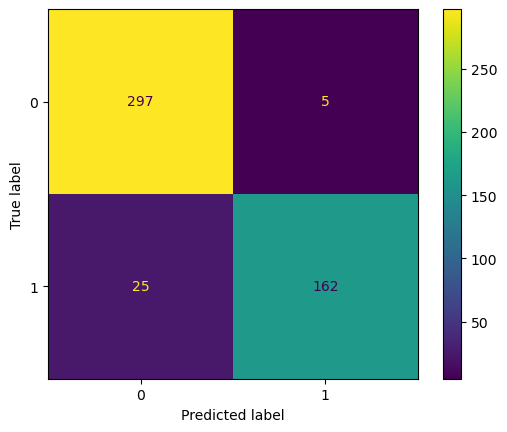

In [45]:
print(class_report)

ConfusionMatrixDisplay.from_estimator(knn, xtrain, ytrain)

6. What are the differences in the evaluation metrics? Which performs better on your in-sample data? Why?

In [47]:
metrics = []

for k in range(1, 21):
    #MAKE the thing
    knn = KNeighborsClassifier(n_neighbors=k)
    #FIT the thing
    knn.fit(xtrain, ytrain)
    #USE the thing
    train_score= knn.score(xtrain, ytrain)
    validate_score = knn.score(xvalidate, yvalidate)
    
    output = {
        "k": k,
        "train_score": train_score,
        "validate_score": validate_score}
    
    metrics.append(output)

In [56]:
df = pd.DataFrame(metrics)
df.head()

,k,train_score,validate_score
0,1,0.920245,0.721973
1,2,0.836401,0.677130
2,3,0.848671,0.762332
3,4,0.820041,0.775785
4,5,0.799591,0.748879


7. Which model performs best on our out-of-sample data from validate?

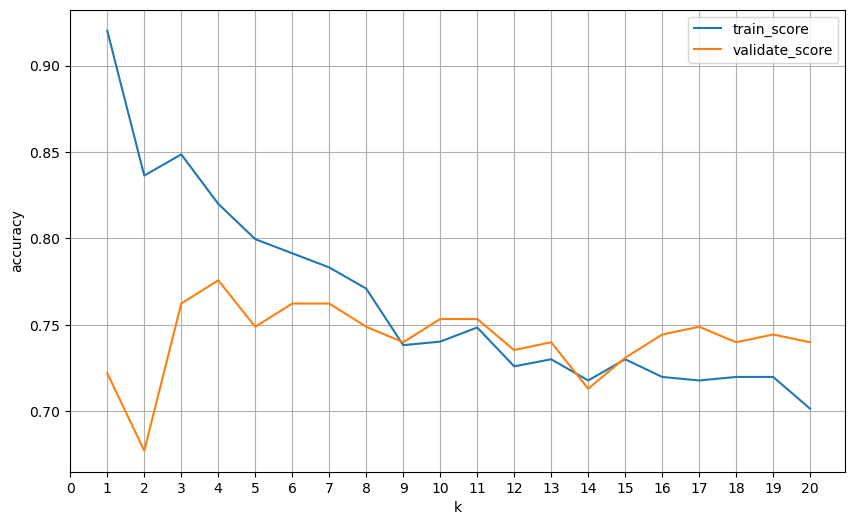

In [54]:
#PLOT the data
df.set_index('k').plot(figsize=(10,6))
plt.ylabel('accuracy')
plt.xticks(np.arange(0,21,1))
plt.grid()
plt.show()

Model 9 looks to be performing better in this case.